# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning & Preparation

#### Import Company Data

In [2]:
df_c = pd.read_csv('companies.csv')

In [3]:
df_c.head(5)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


In [4]:
df_c.isna().sum()

company_id         0
name               1
description      143
company_size    1105
state              8
country            0
city               1
zip_code          12
address           11
url                0
dtype: int64

In [5]:
#drop columns not needed
df_c.drop(columns= ['address','url','description'], inplace=True)

In [6]:
#drop companies with no name
df_c.dropna(subset=['name'], inplace=True)

In [7]:
df_c

,company_id,name,company_size,state,country,city,zip_code
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504
1,1016,GE HealthCare,7.0,0,US,Chicago,0
2,1021,GE Power,7.0,NY,US,Schenectady,12345
3,1025,Hewlett Packard Enterprise,7.0,Texas,US,Houston,77389
4,1028,Oracle,7.0,Texas,US,Austin,78741
...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,3.0,0,0,0,0
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA",2.0,CO,US,Boulder,80303
11358,3700147810,Ascendo Resources,3.0,FL,US,Coral Gables,33134
11359,3700150295,The Crox Group,2.0,Illinois,US,Lincolnwood,60712


### Import Industry Data

In [8]:
df_i = pd.read_csv('company_industries.csv')

In [9]:
df_i.head(5)

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising


In [10]:
#merge companies and industry data
df_ci= pd.merge(df_c, df_i, on='company_id', how='inner')

In [11]:
df_ci

,company_id,name,company_size,state,country,city,zip_code,industry
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,IT Services and IT Consulting
2,1016,GE HealthCare,7.0,0,US,Chicago,0,Hospital & Health Care
3,1016,GE HealthCare,7.0,0,US,Chicago,0,Hospitals and Health Care
4,1021,GE Power,7.0,NY,US,Schenectady,12345,Renewables & Environment
...,...,...,...,...,...,...,...,...
12550,101065652,AUX CLOUD COMMERCE(USA)INC,1.0,0,0,0,0,"Appliances, Electrical, and Electronics Manufa..."
12551,101068739,"IZI1 Operations, LLC",1.0,Florida,US,St Petersberg,0,Truck Transportation
12552,101069729,SunSource Power,1.0,0,0,0,0,IT Services and IT Consulting
12553,101173981,Cultivate Charlottesville,1.0,VA,US,Charlottesville,22911,Non-profit Organizations


In [12]:
df_ci['industry'].unique()

array(['Information Technology & Services',
       'IT Services and IT Consulting', 'Hospital & Health Care',
       'Hospitals and Health Care', 'Renewables & Environment',
       'Renewable Energy Semiconductor Manufacturing',
       'Business Consulting and Services', 'Management Consulting',
       'Industrial Automation', 'Telecommunications', 'Computer Software',
       'Software Development', 'Financial Services', 'Consumer Goods',
       'Banking', 'Pharmaceuticals', 'Pharmaceutical Manufacturing',
       'Medical Equipment Manufacturing', 'Armed Forces',
       'Entertainment Providers', 'Entertainment',
       'Electrical & Electronic Manufacturing',
       'Appliances, Electrical, and Electronics Manufacturing',
       'Aviation and Aerospace Component Manufacturing', 'Oil & Energy',
       'Oil and Gas', 'Food and Beverage Services', 'Manufacturing',
       'Defense & Space', 'Defense and Space Manufacturing',
       'Food & Beverages', 'Human Resources', 'Human Resources S

In [13]:
#rename rows for standardization
df_ci['industry']=df_ci['industry'].replace({'IT Services':'Information Technology & Services', 'Hospital & Health Care':'Health Care','Wholesale Building Materials':'Building Materials','Beverage Manufacturing':'Manufacturing','Supermarkets': 'Grocery Store', 'Retail Groceries':'Grocery Store','Media Production':'Productions','Public Relations and Communications':'Public Relations & Communications',
                                           'Hospitals and Health Care':'Health Care', 'Renewables & Environment':'Renewable Energy','Renewable Energy Semiconductor Manufacturing':'Manufacturing','Pharmaceutical Manufacturing':'Pharmaceutical', 'Software Development':'Computer Software','Writing & Editing':'Publications','Animation and Post-production':'Production','Animation':'Production',
                                            'Pharmaceutical':'Pharmaceuticals','Entertainment Providers':'Entertainment','Electrical & Electronic Manufacturing':'Electricals & Electronics', 'Appliances':'Electricals & Electronics', 'Electrical':'Electricals & Electronics', 'and Electronics Manufacturing':'Electricals & Electronics','Travel Arrangements':'Logistics','Legal Services':'Law',
                                            'Appliances, Electrical, and Electronics Manufacturing':'Electricals & Electronics','Medical Equipment Manufacturing':'Medical Equipments','Aviation and Aerospace Component Manufacturing':'Aviation and Aerospace','Food and Beverage Services':'Consumer Goods','Dairy Product Manufacturing':'Manufacturing','Primary/Secondary Education':'Education',
                                            'Leasing Non-residential Real Estate':'Real Estate', 'Warehousing':'Real Estate','Railroad Manufacture':'Manufacturing','Tobacco Manufacturing':'Manufacturing','Medical Practice':'Health Care','Wholesale Import and Export':'Import & Export','Commercial Real Estate':'Real Estate','Maritime Transportation':'Maritime','Textile Manufacturing':'Manufacturing',
                                            'Food and Beverage Manufacturing':'Manufacturing','Transportation, Logistics, Supply Chain and Storage':'Logistics','Medical Practices':'Health Care', 'Dairy' : 'Consumer Goods','Music':'Entertainment', 'Online Audio and Video Media':'Entertainment','Online Media':'Entertainment','Media Production':'Production', 'Primary and Secondary Education':'Education',
                                            'Railroad Equipment Manufacturing':'Manufacturing','Plastics Manufacturing':'Manufacturing','Gambling & Casinos':'Gambling Facilities and Casinos','Computers and Electronics Manufacturing':'Manufacturing','Public Relations and Communications Services':'Public Relations and Communications','Human Resources':'Human Resources Services','IT Services and IT Consulting':'Information Technology & Services',
                                             'Motor Vehicle Manufacturing':'Manufacturing', 'Semiconductors':'Electricals & Electronics','Semiconductor Manufacturing':'Manufacturing', 'Food Production':'Consumer Goods','Transportation/Trucking/Railroad':'Transportation', 'Truck Transportation':'Transportation','Biotechnology Research':'Biotechnology','Freight and Package Transportation':'Transportation',
                                            'Higher Education':'Education','Personal Care Product Manufacturing':'Manufacturing', 'Package/Freight Delivery':'Logistics','Staffing & Recruiting':'Human Resources Services','Staffing and Recruiting':'Human Resources Services','Broadcast Media Production and Distribution':'Entertainment','Information Services':'Information Technology & Services',
                                            'Mechanical Or Industrial Engineering':'Engineering','Political Organization':'Politics', 'Paper and Forest Product Manufacturing':' Manufacturing','Packaging and Containers Manufacturing': 'Manufacturing','Internet':'Information Technology & Services','Technology, Information and Internet':'Information Technology & Services','Leisure':'Hospitality',
                                             'Chemical Manufacturing':'Manufacturing', 'Machinery Manufacturing':'Manufacturing','Computer and Network Security':'Information Technology & Services','Professional Training and Coaching':'Education','Computer Networking':'Information Technology & Services','Retail Art Supplies':'Art','Fine Art':'Arts','Alternative Medicine':'Health Care',
                                            'E-learning':'Education','Recreational Facilities & Services':'Recreational Facilities','Legislative Office':'Law','Artists and Writers':'Entertainment','Venture Capital & Private Equity':'Investment','Investment Management':'Investment','Government Relations':'Government','Professional Training & Coaching':'Education','Government Relations Services':'Government',
                                             'Mental Health Care':'Health Care','Education Management':'Education','Judiciary':'Law','Education Administration Programs':'Education','Public Relations and Communications':'Public Relations & Communications','Glass, Ceramics and Concrete Manufacturing':'Glass, Ceramics & Concrete','Sporting Goods':'Sports','Sporting Goods Manufacturing':'Sports',
                                               'Business Supplies & Equipment':'Equipment', 'Retail Office Equipment':'Equipment','Printing':'Printing Services', 'E-Learning Providers':'Education','Leisure':'Hospitality','Defense and Space Manufacturing':'Defense and Space','Venture Capital and Private Equity Principals':'Investment','Industrial Machinery Manufacturing':'Equipment',
                                                'Public Policy Offices':'Government', 'Design':'Architecture','Architecture & Planning':'Architecture','Performing Arts':'Arts', 'Health, Wellness & Fitness':'Health Care', 'Law Practice':'Law','Medical Equipments':'Equipment','Computer & Network Security':'Information Technology & Services', 'Libraries':'Education','Machinery':'Equipment', 'Computer Software':'Information Technology & Services',
                                               'Research Services':'Research', 'Automotive': 'Automation','Industrial Automation':'Automation','Wellness and Fitness Services':'Health Care','Investment Banking':'Banking','Market Research':'Research','Apparel & Fashion':'Apparel & Fashion','Furniture and Home Furnishings Manufacturing':'Manufacturing','Airlines/Aviation':'Aviation and Aerospace','Automation Machinery Manufacturing':'Automation',
                                            'Wholesale Building Materials':'Building Materials', 'Computer Hardware Manufacturing':'Information Technology & Services', 'Musicians':'Entertainment','Book and Periodical Publishing':'Publications', 'Spectator Sports':'Sports','Apparel & Fashion':'Fashion','Retail Apparel and Fashion':'Fashion'})

In [14]:
df_ci

,company_id,name,company_size,state,country,city,zip_code,industry
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services
2,1016,GE HealthCare,7.0,0,US,Chicago,0,Health Care
3,1016,GE HealthCare,7.0,0,US,Chicago,0,Health Care
4,1021,GE Power,7.0,NY,US,Schenectady,12345,Renewable Energy
...,...,...,...,...,...,...,...,...
12550,101065652,AUX CLOUD COMMERCE(USA)INC,1.0,0,0,0,0,Electricals & Electronics
12551,101068739,"IZI1 Operations, LLC",1.0,Florida,US,St Petersberg,0,Transportation
12552,101069729,SunSource Power,1.0,0,0,0,0,Information Technology & Services
12553,101173981,Cultivate Charlottesville,1.0,VA,US,Charlottesville,22911,Non-profit Organizations


### Import Company Speciality Data

In [15]:
df_cs=pd.read_csv('company_specialities.csv')

In [16]:
df_cs

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development
...,...,...
78400,2293632,LED Billboards
78401,2293632,Electronic Message Centers
78402,2293632,Digital Signage
78403,2293632,Outdoor Digital Signage


In [17]:
#merge company specialty on previous merge
df_cis= pd.merge(df_ci, df_cs, on='company_id', how='inner')

In [18]:
df_cis

,company_id,name,company_size,state,country,city,zip_code,industry,speciality
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile
2,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cognitive
3,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Security
4,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Research
...,...,...,...,...,...,...,...,...,...
89858,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cross Training
89859,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cardio Barre/HIIT Training
89860,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Aggie Owned and Operated
89861,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Highly Trained Teachers


### Import Employee Data

In [19]:
df_ec=pd.read_csv('employee_counts.csv')

In [20]:
df_ec

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,1.692645e+09
1,10033339,3,187,1.692645e+09
2,6049228,20,82,1.692645e+09
3,2641066,45,2336,1.692645e+09
4,96649998,0,2,1.692645e+09
...,...,...,...,...
14270,829374,2455,58753,1.699140e+09
14271,5574,8281,96163,1.699140e+09
14272,10135152,6322,31953,1.699140e+09
14273,373873,45,30298,1.699140e+09


#### Merge Company, Employee, Industry , Speciality Data to df1

In [21]:
df1= pd.merge(df_cis, df_ec, on='company_id', how='inner')

In [22]:
df1

,company_id,name,company_size,state,country,city,zip_code,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,316130,16114398,1.692851e+09
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,308001,15467710,1.698964e+09
2,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,316130,16114398,1.692851e+09
3,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,308001,15467710,1.698964e+09
4,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cognitive,316130,16114398,1.692851e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
131432,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cross Training,0,2,1.699139e+09
131433,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cardio Barre/HIIT Training,0,2,1.699139e+09
131434,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Aggie Owned and Operated,0,2,1.699139e+09
131435,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Highly Trained Teachers,0,2,1.699139e+09


In [23]:
df1.drop(columns=['follower_count'], inplace=True)

In [24]:
df1

,company_id,name,company_size,state,country,city,zip_code,industry,speciality,employee_count,time_recorded
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,316130,1.692851e+09
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,308001,1.698964e+09
2,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,316130,1.692851e+09
3,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,308001,1.698964e+09
4,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cognitive,316130,1.692851e+09
...,...,...,...,...,...,...,...,...,...,...,...
131432,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cross Training,0,1.699139e+09
131433,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cardio Barre/HIIT Training,0,1.699139e+09
131434,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Aggie Owned and Operated,0,1.699139e+09
131435,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Highly Trained Teachers,0,1.699139e+09


In [25]:
from datetime import datetime
#change format of date notations to actual date
df1['time_recorded'] = df1['time_recorded'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%d %B, %Y'))

In [26]:
df1

,company_id,name,company_size,state,country,city,zip_code,industry,speciality,employee_count,time_recorded
0,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,316130,"24 August, 2023"
1,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cloud,308001,"02 November, 2023"
2,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,316130,"24 August, 2023"
3,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Mobile,308001,"02 November, 2023"
4,1009,IBM,7.0,NY,US,"Armonk, New York",10504,Information Technology & Services,Cognitive,316130,"24 August, 2023"
...,...,...,...,...,...,...,...,...,...,...,...
131432,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cross Training,0,"04 November, 2023"
131433,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Cardio Barre/HIIT Training,0,"04 November, 2023"
131434,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Aggie Owned and Operated,0,"04 November, 2023"
131435,101059464,Pure Barre College Station,1.0,Texas,US,College Station,77845,Health Care,Highly Trained Teachers,0,"04 November, 2023"


### Import Job Industry

In [27]:
df_j=pd.read_csv('job_industries.csv')

In [28]:
df_j

,job_id,industry_id
0,3378133231,68
1,3497509795,96
2,3690843087,47
3,3691775263,112
4,3691779379,80
...,...,...
44086,3757486249,47
44087,3757486249,43
44088,3757780487,104
44089,3757934256,80


### Import Benefit Data

In [29]:
df_b=pd.read_csv('benefits.csv')

In [30]:
df_b

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
29320,3757934256,0,401(k)
29321,3757934256,0,Paid paternity leave
29322,3757934256,0,Paid maternity leave
29323,3757934256,0,Disability insurance


In [31]:
#merge benefits on job industry
df_m= pd.merge(df_j, df_b, on='job_id', how='inner')

In [32]:
df_m

,job_id,industry_id,inferred,type
0,3690843087,47,0,Medical insurance
1,3690843087,47,0,Dental insurance
2,3690843087,47,0,401(k)
3,3690843087,47,0,Paid maternity leave
4,3690843087,47,0,Disability insurance
...,...,...,...,...
39915,3757934256,80,0,401(k)
39916,3757934256,80,0,Paid paternity leave
39917,3757934256,80,0,Paid maternity leave
39918,3757934256,80,0,Disability insurance


### Import Job Skill Data

In [33]:
df_js=pd.read_csv('job_skills.csv')

In [34]:
df_js

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
56586,3757780487,HCPR
56587,3757934256,DSGN
56588,3757934256,ART
56589,3757934256,IT


In [35]:
#merge job data on job skill
df_m= pd.merge(df_m, df_js, on='job_id', how='inner')

In [36]:
df_m

,job_id,industry_id,inferred,type,skill_abr
0,3690843087,47,0,Medical insurance,ACCT
1,3690843087,47,0,Medical insurance,FIN
2,3690843087,47,0,Dental insurance,ACCT
3,3690843087,47,0,Dental insurance,FIN
4,3690843087,47,0,401(k),ACCT
...,...,...,...,...,...
74427,3757934256,80,0,Paid maternity leave,IT
74428,3757934256,80,0,Disability insurance,DSGN
74429,3757934256,80,0,Disability insurance,ART
74430,3757934256,80,0,Disability insurance,IT


### Import Salary Data

In [37]:
df_s=pd.read_csv('salaries.csv')

In [38]:
df_s

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3378133231,30.0,NaN,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,NaN,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,NaN,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,NaN,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,NaN,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,NaN,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,NaN,48.0,NaN,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,NaN,45000.0,YEARLY,USD,BASE_SALARY


In [39]:
#merge salary on previous job merge
df_m= pd.merge(df_m, df_s, on='job_id', how='inner')

In [40]:
df_m

,job_id,industry_id,inferred,type,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,3690843087,47,0,Medical insurance,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
1,3690843087,47,0,Medical insurance,FIN,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
2,3690843087,47,0,Dental insurance,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
3,3690843087,47,0,Dental insurance,FIN,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
4,3690843087,47,0,401(k),ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...
40370,3757486249,43,0,Tuition assistance,ACCT,13740,115000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY
40371,3757486249,43,0,Student loan assistance,CNSL,13740,115000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY
40372,3757486249,43,0,Student loan assistance,ACCT,13740,115000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY
40373,3757486249,43,0,Disability insurance,CNSL,13740,115000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY


### Import Industry Data

In [41]:
df_i=pd.read_csv('industries.csv')

In [42]:
df_i

,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
224,3240,Renewable Energy Power Generation
225,3241,Renewable Energy Equipment Manufacturing
226,3242,Engineering Services
227,3243,Services for Renewable Energy


In [43]:
#merge industry data on previous merge
df_m= pd.merge(df_m, df_i, on='industry_id', how='inner')

In [44]:
df_m

,job_id,industry_id,inferred,type,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type,industry_name
0,3690843087,47,0,Medical insurance,ACCT,2,65000.00,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting
1,3690843087,47,0,Medical insurance,FIN,2,65000.00,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting
2,3690843087,47,0,Dental insurance,ACCT,2,65000.00,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting
3,3690843087,47,0,Dental insurance,FIN,2,65000.00,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting
4,3690843087,47,0,401(k),ACCT,2,65000.00,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,3757480049,3195,1,401(k),ADM,13018,NaN,12.0,NaN,HOURLY,USD,BASE_SALARY,Food & Beverages
40371,3757496520,1779,1,401(k),ENG,13149,26.72,NaN,22.5,HOURLY,USD,BASE_SALARY,Equipment Rental Services
40372,3757496520,1779,1,401(k),IT,13149,26.72,NaN,22.5,HOURLY,USD,BASE_SALARY,Equipment Rental Services
40373,3757496520,1779,1,Disability insurance,ENG,13149,26.72,NaN,22.5,HOURLY,USD,BASE_SALARY,Equipment Rental Services


### Import Skills Data

In [45]:
df_sk=pd.read_csv('skills.csv')

In [46]:
df_sk

,skill_abr,skill_name
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


#### Merge Job industry, Benefits, Salary , Job skill Industry data to df2

In [47]:
df2= pd.merge(df_m, df_sk, on='skill_abr', how='inner')

In [48]:
df2

,job_id,industry_id,inferred,type,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type,industry_name,skill_name
0,3690843087,47,0,Medical insurance,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting,Accounting/Auditing
1,3690843087,47,0,Dental insurance,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting,Accounting/Auditing
2,3690843087,47,0,401(k),ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting,Accounting/Auditing
3,3690843087,47,0,Paid maternity leave,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting,Accounting/Auditing
4,3690843087,47,0,Disability insurance,ACCT,2,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Accounting,Accounting/Auditing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,3749346362,140,0,Tuition assistance,ADVR,7799,56000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Graphic Design,Advertising
40371,3749346362,140,0,Vision insurance,ADVR,7799,56000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Graphic Design,Advertising
40372,3749346362,140,0,Dental insurance,ADVR,7799,56000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Graphic Design,Advertising
40373,3749346362,140,0,401(k),ADVR,7799,56000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,Graphic Design,Advertising


### Import Postings Data

In [49]:
df_jp=pd.read_csv('job_postings.csv')

In [50]:
df_jp

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1


In [51]:
df3= pd.merge(df_jp, df2, on='job_id', how='inner')

In [52]:
df3

,job_id,company_id,title,description,max_salary_x,med_salary_x,min_salary_x,pay_period_x,formatted_work_type,location,...,skill_abr,salary_id,max_salary_y,med_salary_y,min_salary_y,pay_period_y,currency_y,compensation_type_y,industry_name,skill_name
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,OTHR,13493,NaN,5250.0,NaN,MONTHLY,USD,BASE_SALARY,Medical Equipment Manufacturing,Other
1,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,OTHR,13493,NaN,5250.0,NaN,MONTHLY,USD,BASE_SALARY,Medical Equipment Manufacturing,Other
2,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,ANLS,12965,64000.0,NaN,58000.0,YEARLY,USD,BASE_SALARY,Market Research,Analyst
3,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,ANLS,12965,64000.0,NaN,58000.0,YEARLY,USD,BASE_SALARY,Market Research,Analyst
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,IT,12965,64000.0,NaN,58000.0,YEARLY,USD,BASE_SALARY,Market Research,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,SALE,162,52000.0,NaN,45760.0,YEARLY,USD,BASE_SALARY,Insurance,Sales
40371,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,SALE,162,52000.0,NaN,45760.0,YEARLY,USD,BASE_SALARY,Insurance,Sales
40372,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,IT,9474,80000.0,NaN,35000.0,YEARLY,USD,BASE_SALARY,Personal Care Product Manufacturing,Information Technology
40373,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,ART,9474,80000.0,NaN,35000.0,YEARLY,USD,BASE_SALARY,Personal Care Product Manufacturing,Art/Creative


In [53]:
from datetime import datetime

#change notation to actual date
df3['original_listed_time'] = df3['original_listed_time'].apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d'))


In [54]:
df3['original_listed_time']

0        2023-11-04
1        2023-11-04
2        2023-11-02
3        2023-11-02
4        2023-11-02
            ...    
40370    2023-08-23
40371    2023-08-23
40372    2023-11-03
40373    2023-11-03
40374    2023-11-03
Name: original_listed_time, Length: 40375, dtype: object

In [55]:
df3['pay_period_x']

0        MONTHLY
1        MONTHLY
2         YEARLY
3         YEARLY
4         YEARLY
          ...   
40370     YEARLY
40371     YEARLY
40372     YEARLY
40373     YEARLY
40374     YEARLY
Name: pay_period_x, Length: 40375, dtype: object

In [56]:
df3.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary_x',
       'med_salary_x', 'min_salary_x', 'pay_period_x', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency_x',
       'compensation_type_x', 'scraped', 'industry_id', 'inferred', 'type',
       'skill_abr', 'salary_id', 'max_salary_y', 'med_salary_y',
       'min_salary_y', 'pay_period_y', 'currency_y', 'compensation_type_y',
       'industry_name', 'skill_name'],
      dtype='object')

In [57]:
#drop inwanted columns 
df3=df3.drop(columns=['max_salary_y', 'med_salary_y','min_salary_y', 'pay_period_y','job_posting_url', 'application_url', 'posting_domain', 'currency_x','compensation_type_x','closed_time','listed_time', 'currency_x','compensation_type_y','scraped','inferred'])

In [58]:
df3.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary_x',
       'med_salary_x', 'min_salary_x', 'pay_period_x', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'application_type', 'expiry', 'formatted_experience_level',
       'skills_desc', 'sponsored', 'work_type', 'industry_id', 'type',
       'skill_abr', 'salary_id', 'currency_y', 'industry_name', 'skill_name'],
      dtype='object')

In [59]:
df3

,job_id,company_id,title,description,max_salary_x,med_salary_x,min_salary_x,pay_period_x,formatted_work_type,location,...,skills_desc,sponsored,work_type,industry_id,type,skill_abr,salary_id,currency_y,industry_name,skill_name
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,0,FULL_TIME,17,Medical insurance,OTHR,13493,USD,Medical Equipment Manufacturing,Other
1,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,0,FULL_TIME,17,Disability insurance,OTHR,13493,USD,Medical Equipment Manufacturing,Other
2,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,NaN,0,FULL_TIME,97,401(k),ANLS,12965,USD,Market Research,Analyst
3,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,NaN,0,FULL_TIME,97,Vision insurance,ANLS,12965,USD,Market Research,Analyst
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.0,NaN,58000.0,YEARLY,Full-time,United States,...,NaN,0,FULL_TIME,97,401(k),IT,12965,USD,Market Research,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1,FULL_TIME,42,Paid maternity leave,SALE,162,USD,Insurance,Sales
40371,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1,FULL_TIME,42,Paid paternity leave,SALE,162,USD,Insurance,Sales
40372,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,Must be a seasoned stylist with an existing bo...,0,FULL_TIME,18,Medical insurance,IT,9474,USD,Personal Care Product Manufacturing,Information Technology
40373,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",...,Must be a seasoned stylist with an existing bo...,0,FULL_TIME,18,Medical insurance,ART,9474,USD,Personal Care Product Manufacturing,Art/Creative


In [60]:
#final merge between fist df and new df
final_df= pd.merge(df3, df1, on='company_id', how='inner')

In [61]:
final_df.head(5)

,job_id,company_id,title,description,max_salary_x,med_salary_x,min_salary_x,pay_period_x,formatted_work_type,location,...,name,company_size,state,country,city,zip_code,industry,speciality,employee_count,time_recorded
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,Digital Hearing Instruments,1171,"04 November, 2023"
1,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,behind ear,1171,"04 November, 2023"
2,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,in ear,1171,"04 November, 2023"
3,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,open ear,1171,"04 November, 2023"
4,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,audiologist,1171,"04 November, 2023"


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107608 entries, 0 to 1107607
Data columns (total 37 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   job_id                      1107608 non-null  int64  
 1   company_id                  1107608 non-null  float64
 2   title                       1107608 non-null  object 
 3   description                 1107608 non-null  object 
 4   max_salary_x                1017411 non-null  float64
 5   med_salary_x                90197 non-null    float64
 6   min_salary_x                1017411 non-null  float64
 7   pay_period_x                1107608 non-null  object 
 8   formatted_work_type         1107608 non-null  object 
 9   location                    1107608 non-null  object 
 10  applies                     765426 non-null   float64
 11  original_listed_time        1107608 non-null  object 
 12  remote_allowed              160246 non-null   float64
 1

In [63]:
#further drop of unwanted columns
final_df=final_df.drop(columns=['time_recorded','expiry','industry_name','work_type','location','skill_abr','location','industry_id','salary_id','skills_desc'])

In [64]:
final_df

,job_id,company_id,title,description,max_salary_x,med_salary_x,min_salary_x,pay_period_x,formatted_work_type,applies,...,skill_name,name,company_size,state,country,city,zip_code,industry,speciality,employee_count
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,NaN,...,Other,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,Digital Hearing Instruments,1171
1,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,NaN,...,Other,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,behind ear,1171
2,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,NaN,...,Other,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,in ear,1171
3,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,NaN,...,Other,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,open ear,1171
4,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,NaN,...,Other,HearingLife,5.0,New Jersey,US,Somerset,08873,Retail,audiologist,1171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107603,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,NaN,...,Design,Karen Marie Salon,NaN,Illinois,US,Chicago,60647,Consumer Services,salon,3
1107604,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,NaN,...,Design,Karen Marie Salon,NaN,Illinois,US,Chicago,60647,Consumer Services,extensions,3
1107605,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,NaN,...,Design,Karen Marie Salon,NaN,Illinois,US,Chicago,60647,Consumer Services,mens hair,3
1107606,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,NaN,...,Design,Karen Marie Salon,NaN,Illinois,US,Chicago,60647,Consumer Services,olaplex,3


In [65]:
#rearrange columns
final_df=final_df[['job_id', 'company_id', 'name', 'title', 'industry','skill_name','description', 'type','speciality', 'max_salary_x','med_salary_x', 'min_salary_x', 'pay_period_x', 'formatted_work_type','applies', 'original_listed_time', 'remote_allowed', 'views',
                   'application_type', 'formatted_experience_level','sponsored', 'currency_y','company_size', 'state', 'country', 'city','zip_code', 'employee_count']]

In [66]:
final_df

,job_id,company_id,name,title,industry,skill_name,description,type,speciality,max_salary_x,...,application_type,formatted_experience_level,sponsored,currency_y,company_size,state,country,city,zip_code,employee_count
0,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,Digital Hearing Instruments,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
1,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,behind ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
2,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,in ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
3,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,open ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
4,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,audiologist,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107603,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,salon,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107604,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,extensions,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107605,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,mens hair,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107606,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,olaplex,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3


In [67]:
final_df.isnull().sum()

job_id                              0
company_id                          0
name                                0
title                               0
industry                            0
skill_name                          0
description                         0
type                                0
speciality                          0
max_salary_x                    90197
med_salary_x                  1017411
min_salary_x                    90197
pay_period_x                        0
formatted_work_type                 0
applies                        342182
original_listed_time                0
remote_allowed                 947362
views                          103423
application_type                    0
formatted_experience_level     133602
sponsored                           0
currency_y                          0
company_size                    28302
state                             810
country                             0
city                                0
zip_code    

In [68]:
final_df['application_type'].unique()

array(['OffsiteApply', 'ComplexOnsiteApply', 'SimpleOnsiteApply'],
      dtype=object)

In [69]:
#change view count from notation to numbers
final_df['views'] = final_df['views'].apply(lambda x: '{:.0f}'.format(x))

In [70]:
#rename columns
final_df=final_df.rename(columns={'name':'Company_Name','type':'Benefits','formatted_work_type':'work_type','applies':'No_of_Applicants','original_listed_time':'Date_Posted','views':'No_of_Views','formatted_experience_level':'Experience_level','currency_y':'Currency',
                                  'max_salary_x':'max_salary', 'med_salary_x':'med_salary','min_salary_x':'min_salary','pay_period_x':'pay_period','title':'Job_Title'})

In [71]:
final_df

,job_id,company_id,Company_Name,Job_Title,industry,skill_name,description,Benefits,speciality,max_salary,...,application_type,Experience_level,sponsored,Currency,company_size,state,country,city,zip_code,employee_count
0,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,Digital Hearing Instruments,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
1,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,behind ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
2,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,in ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
3,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,open ear,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
4,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,audiologist,NaN,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107603,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,salon,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107604,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,extensions,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107605,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,mens hair,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3
1107606,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,olaplex,80000.0,...,ComplexOnsiteApply,NaN,0,USD,NaN,Illinois,US,Chicago,60647,3


In [72]:
final_df.isnull().sum()

job_id                    0
company_id                0
Company_Name              0
Job_Title                 0
industry                  0
skill_name                0
description               0
Benefits                  0
speciality                0
max_salary            90197
med_salary          1017411
min_salary            90197
pay_period                0
work_type                 0
No_of_Applicants     342182
Date_Posted               0
remote_allowed       947362
No_of_Views               0
application_type          0
Experience_level     133602
sponsored                 0
Currency                  0
company_size          28302
state                   810
country                   0
city                      0
zip_code               1967
employee_count            0
dtype: int64

In [73]:
final_df['max_salary'] = final_df['max_salary'].fillna(value=-1)
final_df['med_salary'] = final_df['med_salary'].fillna(value=-1)
final_df['min_salary'] = final_df['min_salary'].fillna(value=-1)
final_df['company_size'] = final_df['company_size'].fillna(value=-1)
final_df['remote_allowed'] = final_df['remote_allowed'].fillna(value=-1)
final_df['zip_code'] = final_df['zip_code'].fillna(value=-1)
final_df['No_of_Applicants'] = final_df['No_of_Applicants'].fillna(value=-1)
final_df['state'] = final_df['state'].fillna(value='Uknown')
final_df['Experience_level'] = final_df['Experience_level'].fillna(value='Uknown')

In [74]:
final_df.isnull().sum()

job_id              0
company_id          0
Company_Name        0
Job_Title           0
industry            0
skill_name          0
description         0
Benefits            0
speciality          0
max_salary          0
med_salary          0
min_salary          0
pay_period          0
work_type           0
No_of_Applicants    0
Date_Posted         0
remote_allowed      0
No_of_Views         0
application_type    0
Experience_level    0
sponsored           0
Currency            0
company_size        0
state               0
country             0
city                0
zip_code            0
employee_count      0
dtype: int64

# Exploratory Data Analysis

In [75]:
final_df

,job_id,company_id,Company_Name,Job_Title,industry,skill_name,description,Benefits,speciality,max_salary,...,application_type,Experience_level,sponsored,Currency,company_size,state,country,city,zip_code,employee_count
0,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,Digital Hearing Instruments,-1.0,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
1,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,behind ear,-1.0,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
2,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,in ear,-1.0,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
3,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,open ear,-1.0,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
4,3757940104,553718.0,HearingLife,Hearing Care Provider,Retail,Other,Overview\n\nHearingLife is a national hearing ...,Medical insurance,audiologist,-1.0,...,OffsiteApply,Entry level,0,USD,5.0,New Jersey,US,Somerset,08873,1171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107603,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,salon,80000.0,...,ComplexOnsiteApply,Uknown,0,USD,-1.0,Illinois,US,Chicago,60647,3
1107604,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,extensions,80000.0,...,ComplexOnsiteApply,Uknown,0,USD,-1.0,Illinois,US,Chicago,60647,3
1107605,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,mens hair,80000.0,...,ComplexOnsiteApply,Uknown,0,USD,-1.0,Illinois,US,Chicago,60647,3
1107606,3958427,630152.0,Karen Marie Salon,Stylist/ Clorist,Consumer Services,Design,Karen Marie is looking for an awesome experien...,Medical insurance,olaplex,80000.0,...,ComplexOnsiteApply,Uknown,0,USD,-1.0,Illinois,US,Chicago,60647,3


In [76]:
import seaborn as nsns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Top 10 Companies with the Most Job Postings

In [77]:
Company_posting_counts = final_df['Company_Name'].value_counts().sort_values(ascending=False)
print(Company_posting_counts.head(10))

Company_Name
DISYS                                         113400
Robert Half                                   106932
Ascendo Resources                              50844
Insight Global                                 48450
Coda Search│Staffing                           25920
Jobot                                          23936
Tremco Commercial Sealants & Waterproofing     23232
Leeds Professional Resources                   18648
Booz Allen Hamilton                            15120
LHH                                            15050
Name: count, dtype: int64


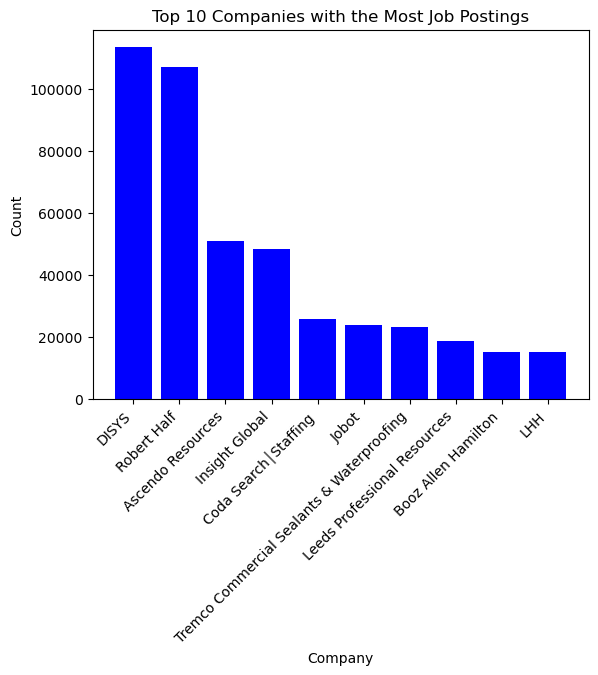

In [78]:
plt.bar(Company_posting_counts.head(10).index,Company_posting_counts.head(10).values , color='blue')

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Top 10 Companies with the Most Job Postings')
plt.xticks(np.arange(len(Company_posting_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(Company_posting_counts.head(10).index)))

plt.show()

### Top 10 Most Sought-After Positions

In [79]:
Job_Title_counts=final_df['Job_Title'].value_counts().sort_values(ascending=False)
Job_Title_counts.head(10)

Job_Title
Rotational Staff Accountant                  24624
Alternative Investments Associate            22680
Mutual Fund Accountant                       22680
Anti-Money Laundering Specialist             22680
 Benefits Customer Service Representative    22680
Event Planner                                22680
Sales Associate                              14848
Senior Billing Coordinator                   13680
Senior Accountant                            11815
Senior Financial Analyst                      9774
Name: count, dtype: int64

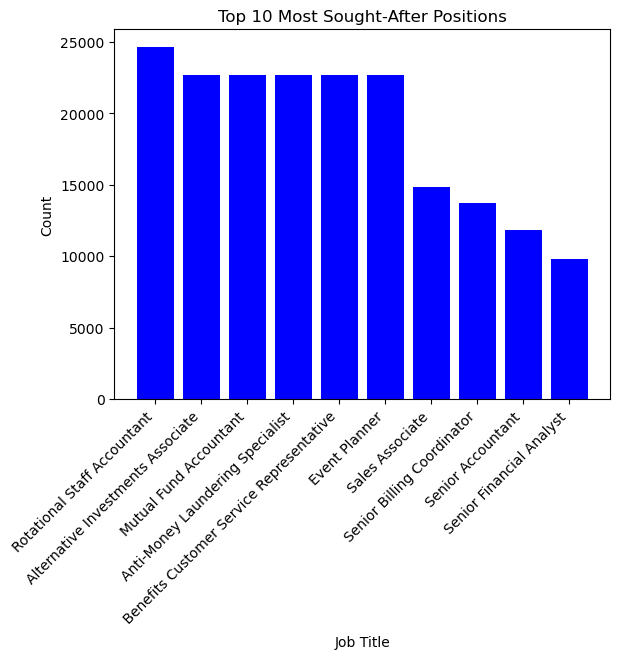

In [80]:
plt.bar(Job_Title_counts.head(10).index, Job_Title_counts.head(10).values, color='blue')

plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Most Sought-After Positions')
plt.xticks(np.arange(len(Job_Title_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(Job_Title_counts.head(10).index)))

plt.show()

### Top 10 Industries with Job Openings

In [81]:
Industry_counts=final_df['industry'].value_counts().sort_values(ascending=False)
Industry_counts.head(10)

industry
Human Resources Services             494216
Information Technology & Services    251491
Health Care                           41638
Transportation                        30479
Building Materials                    25276
Retail                                18025
Computer Software                     17197
Education                             16395
Construction                          13702
Financial Services                    13036
Name: count, dtype: int64

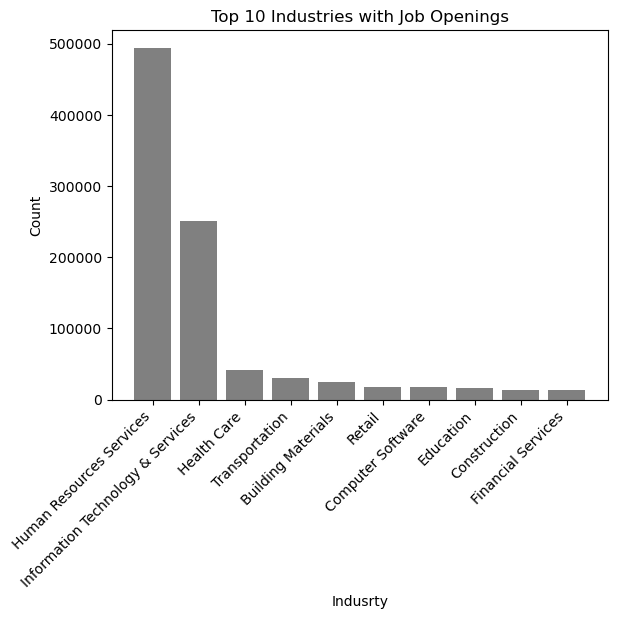

In [82]:
plt.bar(Industry_counts.head(10).index, Industry_counts.head(10).values , color='grey')

plt.xlabel('Indusrty')
plt.ylabel('Count')
plt.title('Top 10 Industries with Job Openings')
plt.xticks(np.arange(len(Industry_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(Industry_counts.head(10).index)))

plt.show()

### Top 10 Industries With Most Applications

In [83]:
industry_counts = final_df.groupby('industry')['No_of_Applicants'].sum()

industry_counts.head(10)

industry
 Manufacturing                  608.0
Accounting                    28395.0
Advertising Services         253222.0
Airlines and Aviation           -48.0
Architecture                  53294.0
Architecture and Planning       -80.0
Art                             336.0
Arts                            131.0
Automation                    39263.0
Aviation & Aerospace            836.0
Name: No_of_Applicants, dtype: float64

In [84]:
final_df['No_of_Applicants'] = final_df['No_of_Applicants'].astype(int)

In [85]:
industry_counts = final_df.groupby('industry')['No_of_Applicants'].sum().sort_values(ascending=False)
print(industry_counts.head(10))


industry
Human Resources Services             5465319
Information Technology & Services    3527657
Computer Software                     428750
Retail                                351082
Financial Services                    269261
Advertising Services                  253222
Entertainment                         242599
Marketing & Advertising               210039
Health Care                           204697
Transportation                        143308
Name: No_of_Applicants, dtype: int32


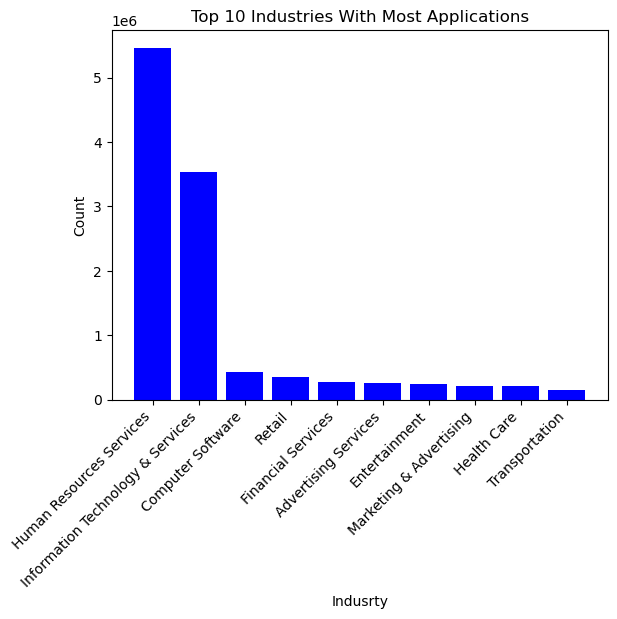

In [86]:
plt.bar(industry_counts.head(10).index, industry_counts.head(10).values, color='blue')

plt.xlabel('Indusrty')
plt.ylabel('Count')
plt.title('Top 10 Industries With Most Applications')
plt.xticks(np.arange(len(industry_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(industry_counts.head(10).index)))

plt.show()

### Top Ten Job Opening Dates

In [87]:
Opening_date_counts=final_df['Date_Posted'].value_counts().sort_values(ascending=False)
Opening_date_counts.head(10)

Date_Posted
2023-11-03    551871
2023-08-22    207766
2023-08-23    128269
2023-08-24     70766
2023-11-04     43839
2023-08-21     41604
2023-11-02     19702
2023-10-09      6414
2023-10-10      5716
2023-10-31      4483
Name: count, dtype: int64

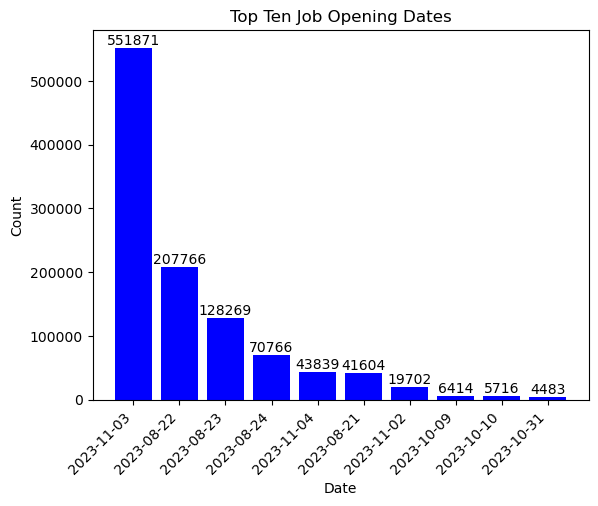

In [88]:
plt.bar(Opening_date_counts.head(10).index, Opening_date_counts.head(10).values, color='blue')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Top Ten Job Opening Dates')
plt.xticks(np.arange(len(Opening_date_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(Opening_date_counts.head(10).index)))

for i, count in enumerate(Opening_date_counts.head(10).values):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.show()

In [89]:
final_df['Date_Posted'] = pd.to_datetime(final_df['Date_Posted'])

# Extract the months and count the occurrences
Opening_month_counts = final_df['Date_Posted'].dt.month.unique()

print(Opening_month_counts)

[11 10  8  7  9]


### Industry Demand By Experience Level

In [90]:
Experience_level_counts=final_df['Experience_level'].value_counts().sort_values(ascending=False)
Experience_level_counts

Experience_level
Mid-Senior level    435425
Associate           254566
Entry level         197664
Uknown              133602
Director             63633
Executive            18399
Internship            4319
Name: count, dtype: int64

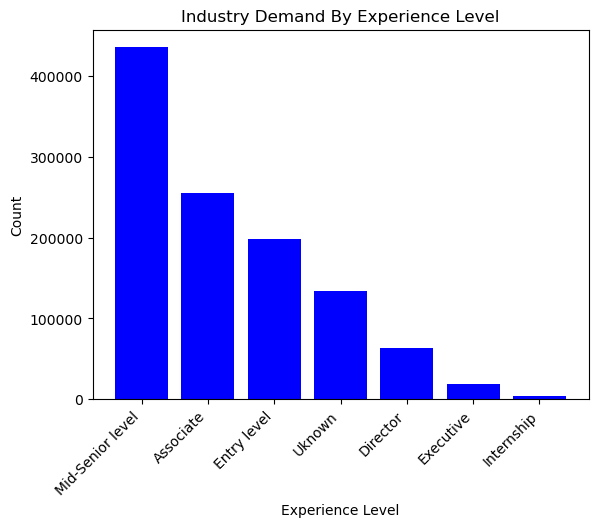

In [91]:
plt.bar(Experience_level_counts.index, Experience_level_counts.values, color='blue')

plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Industry Demand By Experience Level')
plt.xticks(np.arange(len(Experience_level_counts.index)), rotation=45, ha='right')
plt.xticks(np.arange(len(Experience_level_counts.index)))

plt.show()

### Job Openings By Country

In [92]:
Country_counts=final_df['country'].value_counts().sort_values(ascending=False)
Country_counts.head(10)

country
US    1031929
GB      51467
DE       4085
CH       3999
CA       3478
BE       2840
0        2061
IN       1976
FR       1433
NL        698
Name: count, dtype: int64

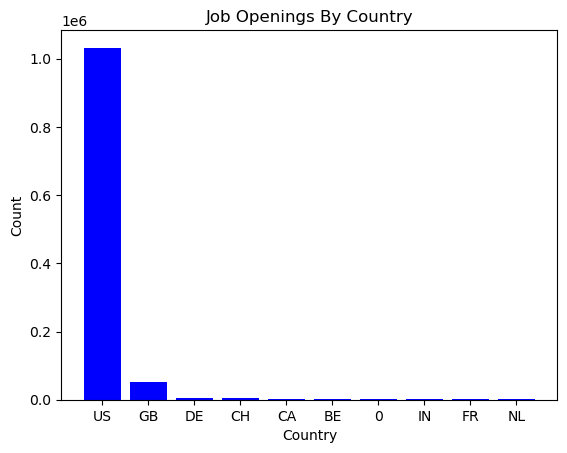

In [93]:
plt.bar(Country_counts.head(10).index, Country_counts.head(10).values, color='blue')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Job Openings By Country')

plt.xticks(np.arange(len(Country_counts.head(10).index)))

plt.show()

### Distribution of Company Sizes

In [94]:
company_size_counts=final_df['company_size'].value_counts().sort_values(ascending=False)
company_size_counts.head(10)

company_size
 5.0    312306
 7.0    310869
 2.0    123713
 3.0    106872
 4.0     96512
 6.0     68612
 1.0     60422
-1.0     28302
Name: count, dtype: int64

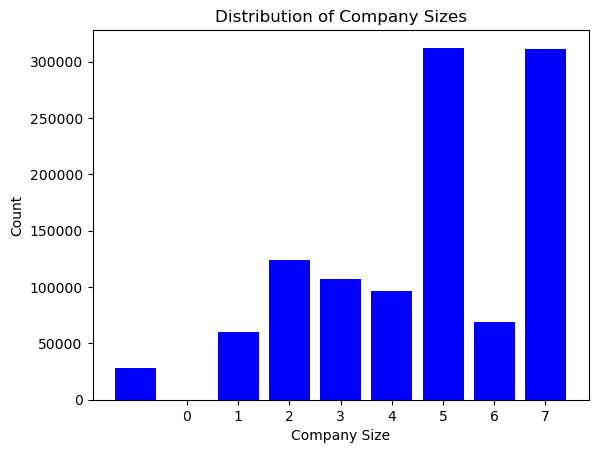

In [95]:
plt.bar(company_size_counts.head(10).index, company_size_counts.head(10).values, color='blue')

plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Distribution of Company Sizes')

plt.xticks(np.arange(len(company_size_counts.head(10).index)))

plt.show()

### Top 10 Benefits Offered by Companies

In [96]:
benefits_counts=final_df['Benefits'].value_counts().sort_values(ascending=False)
benefits_counts.head(10)

Benefits
401(k)                  298921
Medical insurance       167411
Vision insurance        159764
Dental insurance        141732
Disability insurance    103643
Tuition assistance       53778
Commuter benefits        43247
Paid maternity leave     37549
Paid paternity leave     34153
Pension plan             28845
Name: count, dtype: int64

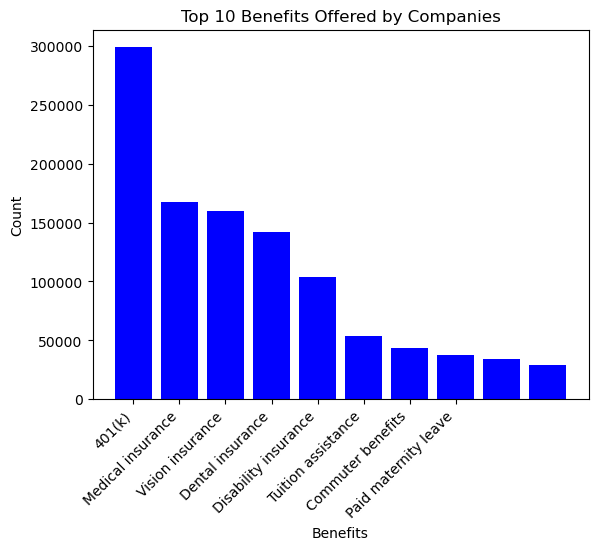

In [97]:
plt.bar(benefits_counts.head(10).index, benefits_counts.head(10).values, color='blue')

plt.xlabel('Benefits')
plt.ylabel('Count')
plt.title('Top 10 Benefits Offered by Companies')

plt.xticks(np.arange(len(company_size_counts.head(10).index)), rotation=45, ha='right')
plt.xticks(np.arange(len(company_size_counts.head(10).index)))

plt.show()

In [ ]:
LinkedInJobs=final_df.to_csv('LinkedInJobs.csv')